In [1]:
import pandas as pd
import numpy as np
import os,tqdm

In [27]:
ck_dir = '../data/test_chunks/'
ps = [p for p in os.listdir(ck_dir) if p[0]=='t']

arrs = []

for p in tqdm.tqdm(ps, total=len(ps)):
    arrs.append(pd.read_hdf('../data/test_chunks/' + p)[['mjd', 'flux']].values.astype(np.float32))
    
arr = np.vstack(arrs)
arr.shape

  0%|          | 0/11 [00:00<?, ?it/s]

test_set_chunk0.h5


  9%|▉         | 1/11 [00:02<00:21,  2.12s/it]

test_set_chunk1.h5


 27%|██▋       | 3/11 [00:04<00:11,  1.47s/it]

test_set_chunk10.h5
test_set_chunk2.h5


 36%|███▋      | 4/11 [00:06<00:11,  1.64s/it]

test_set_chunk3.h5


 45%|████▌     | 5/11 [00:08<00:10,  1.75s/it]

test_set_chunk4.h5


 55%|█████▍    | 6/11 [00:11<00:09,  1.85s/it]

test_set_chunk5.h5


 64%|██████▎   | 7/11 [00:13<00:07,  1.93s/it]

test_set_chunk6.h5


 73%|███████▎  | 8/11 [00:16<00:06,  2.01s/it]

test_set_chunk7.h5


 82%|████████▏ | 9/11 [00:18<00:04,  2.05s/it]

test_set_chunk8.h5


 91%|█████████ | 10/11 [00:21<00:02,  2.12s/it]

test_set_chunk9.h5


100%|██████████| 11/11 [00:23<00:00,  2.16s/it]


(453653104, 2)

In [28]:
# 1/10 subsample
df = pd.DataFrame(arr[::10].copy(), columns=['mjd', 'flux'], dtype='float32')

In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe(percentiles=[0.0001,.001,.01,.1,.25,.5,.75,.9,.99,.999,.9999])

,mjd,flux
count,45365311.000,45365311.000
mean,60179.934,5.988
std,301.915,5459.018
min,59580.035,-7490105.500
0.01%,59580.047,-13456.439
0.1%,59583.094,-5750.201
1%,59594.250,-1863.787
10%,59784.344,-21.726
25%,59922.234,-5.272
50%,60175.977,1.173


In [33]:
df_train = pd.read_csv('../data/training_set.csv', usecols=['mjd', 'flux'])

In [34]:
df_train.describe(percentiles=[0.0001,.001,.01,.1,.25,.5,.75,.9,.99,.999,.9999])

,mjd,flux
count,1421705.000,1421705.000
mean,60179.207,24.689
std,309.238,3684.506
min,59580.034,-1149388.375
0.01%,59580.057,-50311.290
0.1%,59583.110,-6728.466
1%,59593.093,-1203.130
10%,59793.038,-19.140
25%,59899.046,-2.789
50%,60193.310,0.733


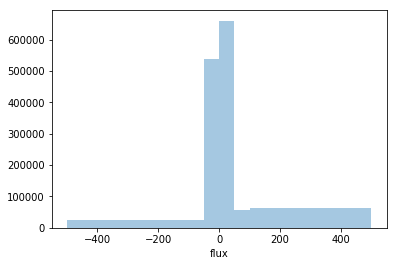

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['flux'], kde=False, bins=[-500, -100, -50, 0, 50, 100, 500])
plt.show()